### Exercise

write a neural network that can become an integral part of the tic-tac-toe bot system. Using the prepared image database, create and train a neural network that recognizes two categories of images: tic and tac toe. Achieve over 95% recognition accuracy (accuracy)


In [49]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam 
from tensorflow.keras import utils 
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt 
from PIL import Image 
%matplotlib inline 

from sklearn.model_selection import train_test_split

In [ ]:
# dataset
#import gdown
#gdown.download('https://storage.yandexcloud.net/aiueducation/Content/base/l3/hw_pro.zip', None, quiet=True)

In [ ]:
#  !unzip -q hw_pro.zip

In [50]:
# Путь к директории с базой
base_dir = 'hw_pro'
# Создание пустого списка для загрузки изображений обучающей выборки
x_train = []
# Создание списка для меток классов
y_train = []
# Задание высоты и ширины загружаемых изображений
img_height = 20
img_width = 20
# Перебор папок в директории базы
for patch in os.listdir(base_dir):
    # Перебор файлов в папках
    for img in os.listdir(base_dir + '/' + patch):
        # Добавление в список изображений текущей картинки
        x_train.append(image.img_to_array(image.load_img(base_dir + '/' + patch + '/' + img,
                                                         target_size=(img_height, img_width),
                                                         color_mode='grayscale')))
        # Добавление в массив меток, соответствующих классам
        if patch == '0':
            y_train.append(0)
        else:
            y_train.append(1)
# Преобразование в numpy-массив загруженных изображений и меток классов
x_train_base= np.array(x_train)          # вход
y_train_base = np.array(y_train)          # Вывод  
# Вывод размерностей
print('Размер массива x_train_base', x_train_base.shape)
print('Размер массива y_train_base', y_train_base.shape)

Размер массива x_train_base (102, 20, 20, 1)
Размер массива y_train_base (102,)


## Data preparation

In [51]:
#Split the data to 70% training and 30% testing
x_train_base , x_test_base, y_train_base, y_test_base = train_test_split(x_train_base, y_train_base, test_size=0.3)

In [52]:
x_test_base.shape

(31, 20, 20, 1)

In [53]:
y_test_base.shape

(31,)

In [54]:
x_train_v = x_train_base.reshape(x_train_base.shape[0], -1)   #transform the image into a simpler form - into a one-dimensional sequence of numbers (vector).
x_test_v= x_test_base.reshape(x_test_base.shape[0], -1)   
print('Размер массива x_train_v', x_train_v.shape)
print('Размер массива x_test_v', x_test_v.shape)

Размер массива x_train_v (71, 400)
Размер массива x_test_v (31, 400)


In [55]:
# Normalization of input pictures
# Convert x_train to type float32 (floating point numbers) and normalize between 0 and 1
x_train_fl = x_train_v.astype('float32') / 255.
x_test_fl = x_test_v.astype('float32') / 255.
print(x_train_fl.shape, x_test_fl.shape)

(71, 400) (31, 400)


In [56]:
 # Set a constant for the number of recognized classes to one hot encoding.
CLASS_COUNT = 2  # crosses=1 and zeros=0
# Convert responses to one_hot_encoding format
y_train_enc = utils.to_categorical(y_train_base, CLASS_COUNT)
y_test_enc = utils.to_categorical(y_test_base, CLASS_COUNT)
print(y_train_enc.shape, y_test_enc.shape)

(71, 2) (31, 2)


##Creation of a neural network

In [57]:
model = Sequential()
model.add(Dense(16, input_dim=400, activation='relu'))    
model.add(Dense(8,activation='relu'))
model.add(Dense(CLASS_COUNT, activation='softmax')) 
 


model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                6416      
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 2)                 18        
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
_________________________________________________________________


## Neural network training

In [59]:
model.fit(x_train_fl,        # training sample, input data
          y_train_enc,       # training set, output
          batch_size=128, # number of examples that the neuron processes before one weight change
          epochs=25,      # the number of epochs when the neuron is trained on all examples of the sample
          verbose=1          )      # 0 - do not visualize learning progress, 1 - visualize

Epoch 1/25
1/1 [==============================] - 0s 5ms/step - loss: 0.4765 - accuracy: 0.8451
Epoch 2/25
1/1 [==============================] - 0s 5ms/step - loss: 0.4687 - accuracy: 0.8451
Epoch 3/25
1/1 [==============================] - 0s 5ms/step - loss: 0.4579 - accuracy: 0.8592
Epoch 4/25
1/1 [==============================] - 0s 42ms/step - loss: 0.4457 - accuracy: 0.8592
Epoch 5/25
1/1 [==============================] - 0s 4ms/step - loss: 0.4358 - accuracy: 0.9155
Epoch 6/25
1/1 [==============================] - 0s 4ms/step - loss: 0.4279 - accuracy: 0.8873
Epoch 7/25
1/1 [==============================] - 0s 18ms/step - loss: 0.4190 - accuracy: 0.8873
Epoch 8/25
1/1 [==============================] - 0s 4ms/step - loss: 0.4084 - accuracy: 0.8873
Epoch 9/25
1/1 [==============================] - 0s 11ms/step - loss: 0.3971 - accuracy: 0.9155
Epoch 10/25
1/1 [==============================] - 0s 4ms/step - loss: 0.3876 - accuracy: 0.9296
Epoch 11/25
1/1 [===================

In [60]:
#save the weights of your model
model.save_weights('model.h5')
model.load_weights('model.h5')

## Handwriting recognition X, 0:

In [61]:
x_train_base=np.reshape(x_train_base,(x_train_base.shape[0],x_train_base.shape[1],-1))
x_test_base=np.reshape(x_test_base,(x_test_base.shape[0],x_test_base.shape[1],-1))
print(x_train_base.shape,x_test_base.shape)

(71, 20, 20) (31, 20, 20)


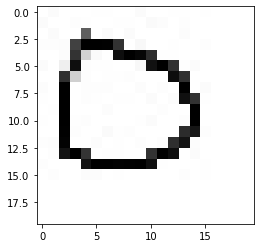

In [62]:

#   test to recognize
n_rec = np.random.randint(x_test_base.shape[0])

# Displaying a picture from the test set under the number n_rec
plt.imshow(x_test_base[n_rec], cmap='gray')
plt.show()

In [63]:
#Selecting the desired image from the test sample
x = x_test_fl[n_rec]

# Data Form Validation
print(x.shape)

(400,)


In [64]:
# Adding one axis at the beginning so that the neuron can recognize the example
# An array of one example, since the neuron accepts exactly arrays of examples (batches) for recognition
x = np.expand_dims(x, axis=0)

# Data form validation
print(x.shape)

(1, 400)


In [65]:
  #Example recognition
  # crosses=1 and zeros=0
prediction = model.predict(x) 

In [66]:
# The output of the result is a vector of 2 numbers
print(prediction)

[[0.66543657 0.33456337]]


In [67]:
# Get and print the index of the largest element (this is the value of the digit that the network recognized)
pred = np.argmax(prediction)
print(f'Recognized : {pred}')

Recognized : 0
